## Inisialisasi

In [1]:
#inisialisasi
import pandas as pd #Format data DataFrame
import numpy as np  #Format data Numpy Array

#Library Pre-processing
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Inisialisasi Library Artificial Neural Network Backpropagation
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Inisialisasi Feature Extraction Library TF-IDF
from sklearn import metrics	
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

#inisialisasi Library Pengujian Confusion matrix
from sklearn.metrics import confusion_matrix #tidak digunakan
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score #tidak digunakan
from sklearn.metrics import precision_score #tidak digunakan
from sklearn.metrics import f1_score #tidak digunakan

#Library Visualisasi Data
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## Import Data

In [2]:
# Input Data
df = pd.read_excel("data fix.xlsx") #membaca data
df.head(5) #menampilkan 5 baris awal data

,Username,Tweet,Label
0,taekucheng,@chaobaanrk Ni knp saya yg ditag🥲 @gummierange...,1
1,ekaagung52,@15eights @sbmptnfess haloo maaf banget akunny...,1
2,_shahahahahaha,"@polbanfess Ya beda-beda atuh, ga bisa disamar...",1
3,zephaniaky,"@i0heum Kenapahhh, @i0heum kamu selonya kapan ...",1
4,arranjj,"@purpleasehere @wafdaishere bener bestie, mung...",1


## Data Cleansing

In [3]:
#membuang kolom yang tidak digunakan
df = df.drop(['Username'], axis=1) #Membuang kolom username
df.tail(5) #menampilkan 5 baris terakhir data

,Tweet,Label
137,"@txtdarionlshop Ongkos menanam padi di mars, @...",1
138,@collegemenfess Data tidak normal bukan akhir ...,0
139,"@vwuci Hahaha, Itu kaki kecilnya kaku kyk cm b...",0
140,"i think today is the best day !!!!!, @growtica...",0
141,"@palashv2 Wkwk land, @shafiraawinanda Kulewati...",1


## Pre-processing

## Text Cleansing (Perform in Numpy Array)

In [4]:
#membuat fungsi text_cleansing untuk memberdihkan teks data
def text_cleansing(data) :
    x = 0 #parameter kontrol perulangan
    y = 0 #parameter kontrol perulangan
    #Memulai loop perulangan
    while x <= 141 :
        data[x][y] = re.sub(r'@[A-Za-z0-9]+', '', data[x][y])  #removing mentions
        data[x][y] = re.sub(r'#', '', data[x][y])              #removing hashtag
        data[x][y] = re.sub(r'RT[\s]+', '', data[x][y])        #removing retweet
        data[x][y] = re.sub(r'https?:\/\/\S+', '', data[x][y]) #removing the hyperlink
        x += 1 #parameter kontrol perulangan
    return data

data_cleansed = np.array(df) #merubah data kedalam format numpy array
data_cleansed = text_cleansing(data_cleansed) #memanggil dan mewnjalankan fungsi text_cleansing

## Text Stemming (Perform in Numpy Array)

In [5]:
# Membuat fungsi text_stemming untuk melakukan teks stemming
def text_stemming(data) :
    factory = StemmerFactory() #memanggil method StemmerFactory
    stemmer = factory.create_stemmer() #memanggil fungsi create_stemmer

    x = 0 #parameter kontrol perulangan
    y = 0 #parameter kontrol perulangan
    #memulai loop perulangan
    while x <= 141 :
        data[x][y] = stemmer.stem(data[x][y]) #mengganti data[x][y] dengan data [x][y] yang sudah di-stemming
        x += 1 #parameter kontrol perulangan
    return data

data_stemmed = np.array(data_cleansed) #merubah data kedalam format numpy array
data_stemmed = text_stemming(data_stemmed) #memanggil dan menjalankan fungsi text_stemming

## Stopword Removal (perform in Pandas Dataframe)

In [6]:
#ini hanya untuk mempermudah ngambil kata pada diagram untuk dimasukkan kedalam stopword list
#''''
more_stopword = ['kaga','kmrn','in','yg','aku','ga','aja','jadi','sama','sama','udah','banget','kalo','mau','wkwk','nya','bgt'
                 'orang','buat','si','apa','i','you','buat','the','gak','wkwkwk','wkwkwkwk','baru','sampe','tau','tp','dulu',
                 'hari','dah','gitu','semua','kamu','bukan','mah','gini','jangan','to','pas','udh','for','jg','jd','a','banyak',
                 'gak','l','4','org','lebih','suka','at','kok','masuk','lama','7','6','1','2','3','kan','lah','with','yaa','bikin',
                 'iya','kak','mana','me','biar','kek','kalau','yaa','kok','kan','gk','lg','malah','pake','it','gin','ken','eh',
                 'tuh','nder','emang','cuma','kaya','lu','kali','my','and','gw','s','bener','this','so','yuk','sm','terus',
                 'pernah','siapa','kerja','beli','t','is','w','ni','nih','alah','jam','ku','baik','diri','makan','akhir','liat',
                 'sendiri','punya','tidur','temen','tahun','pic','alah','dong','deh','enak','in','gabisa','gatau','teh','bulan',
                 'tidur','salah','-','gimana','moga','klo','thankyou','rumah','skrg','that','5','smt','emg','paling','mending',
                 'dm','rasa','alah','biasa','nyata','allah','of','69','dapet','sangat','ka','aing','u','anak','waktu','satu',
                 'kata','karna','nang','besok','done','tiap','jalan','makin','by','doang','ganti','mas','be','nonton','but','mt',
                 'square','we','cara','haryono','case','tak','pagi','sekarang','langsung','ak','lupa','tu','gt','semangat','sini',
                 'selalu','trs','kayak','main','twt','ikut','mungkin','can','kl','beda','padahal','minta','masa','kasih','no','on',
                 'depan','balik','bilang','mulu','tpi','bang','lo','knp','just','lalu','bs','km','lgsg','kpn','y','bawa','bakal',
                 'buka','abis','hehe','anjir','nama','doi','have','haha','hahaha','hati','buka','gaada','siap','tpi','ngga','min',
                 'coba','link','kapan','bagus','sekali','time','asa','2022','kira','kau','halo','g','up','minggu','tanya','mulai',
                 'nitip','ama','cari','tinggal','lihat','jual','day','ayo','onradar','sering','like','asli','gapapa','tetep','dpt',
                 'terima','trus','wa','berapa','hihi','neng','your','tadi','don','order','keren','memang','malem','jgn','thank',
                 'makasih','selamat','bapak','klik','bio','tempat','kena','reg','snackbox','what','ketemu','got','dont','wkwkw',
                 'when','ko','beneran','cowo','amp','req','vote','dr','blm','if','keluar','gratis','m','terlalu','bole','d','nunggu',
                 'kurang','iheartawards','ah','untung','chat','gas','lewat','kakak','indonesia','isi','katla','one','id','gmn','know',
                 'all','minum','sedang','penting','e','kasi','ambil','ambil','gamau','butuh','sma','tanya2','mirip','pulang','masak',
                 'hasil','kemarin','shopee','kucing','bantu','tunggu','twitter','taun','btw','bandung','na','tiba','bareng','good',
                 'asal','nasi','ntar','tengah','aamiin','percaya','mantan','nyari','awal','mu','kyk','ganteng','jelas','dy','ngomong',
                 'kadang','kiri','gpp','cewe','kalian','tetap','manusia','tugas','deket','krn','loh','testing','pilih','an','pak','jdi',
                 'im','gede','online','are','pertama','berat','ayam','tangan','kecil','jauh','ngapain','will','ae','cepet','selesai',
                 'make','tuju','want','kirain','maul','ra','ten','sebenarnya','yaaa','gausah','bagai','even','potong','why','do','even',
                 'mantap','jawab','cuman','gada','tenang','akun','album','from','10','lanjut','kung2','upload','oke','0','sana',
                 'ngerasa','episode','born','ngakak','mood','teman','parah','dom','game','mandi','bismillah','paham','pgn','baju',
                 'sebenarnya','nanya','stop','only','adangsuryana','arti','oke','0','ngerti','ajaaa','ajaa','info','laptop','too',
                 'begini','dikit','dikit','aman','sebenernya','mang','pc','tentu','bestie','pdhl','kmu','see','lol','seru','hampir',
                 'get','cukup','mo','sol','yak','much','13','ngasih','not','walaupun','lg','ig','sd','mobil','besar','now','indo',
                 'bestmusicvideo','bangettt','perlu','yo','as','hp','luar','nga','wes','episode01','01','dlu','butter','mba','beri',
                 'how','mantul','te','out','motor','iyaa','set','go','yu','kirim','ge','sih','gua','gue','re','ih','another','kaga',
                 'atas','people','bgt','org','orang','man','nya','t','about','video','full','card','live','kemaren','r','hal',
                 'meski','naik','ampe','wkwkwkkw','more','or','nya','12','grup','nah','11','euy','8','kakk','top','ur','akuu','tidak',
                 'thing','they','them','engga','hai','iya','wtb','pd','tdk','yah','adaa','iki','who','ll','ii','nge','p','rya',
                 'makanya','was','ve','9','pln','denger','hehehe','hehehehe','ta','td','heh','song','seblak','mbak','pin','tim',
                 'nyampe','sdh','air','me','ehh','ny','zan','19','jan','30','been','sing','b','sore','bahkan','lot','smp','buy',
                 'gaa','he','nu','tbtb','beberapa','maksud','paket','malam','bngt','barang','bal','niat','jayb','milik','nyokap',
                 'ttp','pokok','back','hundred','last','enggak','panggil','cipta']
                 #,'dream','nct','exo','nctdream','bts','got7','kpop',
                 #'bestfanarmy','btsarmy','jaehyun','lee','mark','v','hyun','kai','baekhyun','comeback']
                 #'''

#Membuat fungsi text_filtering untuk melakukan filter kata
def text_filtering(data) : 
    stop_factory = StopWordRemoverFactory() #memanggil library stopwordRemover
    stop_words = stop_factory.get_stop_words() + more_stopword #memanggil stopword corpus
    stopword = stop_factory.create_stop_word_remover() #memanggil method stopwordRemover
    
    data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words])) #mengganti isi data['tweet'] menjadi teks yang sudah dibersihkan
    return data

data_filtered = pd.DataFrame(data = data_stemmed) #merubah data kedalam bentuk pandas dataframe
data_filtered.columns = ['Tweet', 'Label'] #memberikan nama kolom pada dataframe

data_filtered = text_filtering(data_filtered) #memanggil dan menjalankan fungsi text_filtering
data_filtered.head(5)

,Tweet,Label
0,ditag spill bgitu asikkkk lee bangettttt kuli ...,1
1,haloo maaf huhu sender web rep utamain gaikut ...,1
2,atuh disamaratakan daftar di-kp-in angakatan-a...,1
3,kenapahhh selo sabtu selo trimakasih saran luc...,1
4,upgrade doir upgrade doir pa widodo subuh tern...,1


## Words Count Extracted Based on Library

<AxesSubplot:>

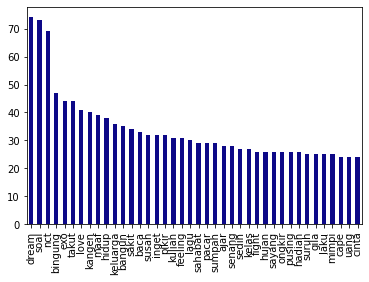

In [7]:
depressed = data_filtered[data_filtered['Label'] == 1] #memasukkan data_filtered dengan label 1 kedalam variabel depressed
depressed_words = pd.Series(' '.join(depressed['Tweet'].astype(str)).split(" ")).value_counts()[:40] #memisah kata per-kata pada corpus dan menghitungnya
depressed_words.plot(kind='bar',stacked=True, colormap='plasma') #menampilkan visualisasi hitung jumlah kata dalam bentuk diagram batang

## Confussion Matrix

In [9]:
#Membuat fungsi confussion matrix (generate tp, tn, fp, fn)
def compute_tp_tn_fp_fn(y_test, y_predict):
    '''
    True positive - actual = 1, predicted = 1
    True negative - actual = 0, predicted = 0
    False positive - actual = 1, predicted = 0
    False negative - actual = 0, predicted = 1
    '''
    tp = sum((y_test == 1) & (y_predict == 1))
    tn = sum((y_test == 0) & (y_predict == 0))
    fp = sum((y_test == 1) & (y_predict == 0))
    fn = sum((y_test == 0) & (y_predict == 1))
    return tp, tn, fp, fn

#Membuat fungsi hitung akurasi
def compute_accuracy(tp, tn, fp, fn):
    '''
    Accuracy = TP + TN / FP + FN + TP + TN

    '''
    return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

#Membuat fungsi hitung presisi
def compute_precision(tp, fp):
    '''
    Precision = TP  / FP + TP 

    '''
    return (tp  * 100)/ float( tp + fp)

#Membuat fungsi hitung recall
def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP 

    '''
    return (tp  * 100)/ float( tp + fn)

#Membuat fungsi hitung F1_Score
def compute_f1_score(y_test, y_predict):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fp_fn(y_test, y_predict)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score * 100

## TF-IDF's Features Extraction

In [47]:
#Inisialisasi
corpus = data_filtered.iloc[:, 0] #data tweet Sebagai Corpus
vocab = depressed['Tweet'] #Data tweet terklasifikasi depresi sebagai vocabulary

#membuat fungsi feature_extraction
def feature_extraction(corpus, vocab) :
    vectorizer = CountVectorizer() #panggil fungsi countvector
    vectorizer.fit_transform(vocab) #fit countvector pada kolom tweet

    vocabulary = vectorizer.get_feature_names() #mengambil fitur pada data di variabel vocab

    pipe = Pipeline([('count', CountVectorizer(vocabulary = vocabulary)), #menghitung dan memasukkan term frequency kedalam kolom 'count'
                     ('tfid', TfidfTransformer())]).fit(corpus) #menghitung dan memasukkan nilai inverse document frequency kedalam kolom 'tfid'
    
    tf = pipe['count'].transform(corpus).toarray() #memasukkan data term frequency kedalam variabel tf
    idf = pipe['tfid'].idf_ #memasukkan data inverse document frequency kedalam variabel idf
    
    x = 0 #parameter kontrol perulangan
    #memulai loop perulangan
    while x < 142 :
        tf[x] = tf[x] * idf #melakukan perhitungan tfidf
        x += 1 #parameter kontrol perulangan
    
    return tf #mengembalikan data_tf sebagai hasil fungsi

#Running Fungsi
tfidf = feature_extraction(corpus, vocab) #memanggil dan menjalankan fungsi feature_extraction

In [49]:
print(tfidf.shape)

(142, 9247)


## Backpropagation Neural Network

In [66]:
#Inisialisasi
x = tfidf #mendefinisikan feature
y = np.array(df['Label']) #mendefinisikan label atau target

#melakukan data split menjadi 90% training dan 10% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [67]:
def backpropagation(x_train, x_test, y_train, y_test,  hl_sizes, learning_rate, iteration) :
    #memanggil fungsi MLPClassifier
    clf = MLPClassifier(random_state = 1, hidden_layer_sizes = hl_sizes, 
                        learning_rate_init = learning_rate, max_iter = iteration)

    #fitting model data menggunakan x_train sebagai fitur data latih dan y_train sebagai target data latih
    clf.fit(x_train, y_train)
    
    #Memprediksi dari data x_test 
    y_predict = clf.predict(x_test) #melakukan prediksi pada data x_test
    
    #Confussion Matrix
    conf_matrix = compute_tp_tn_fp_fn(y_test, y_predict)
    tp, tn, fp, fn = conf_matrix[0],conf_matrix[1],conf_matrix[2],conf_matrix[3]
    #accuration
    accuration = compute_accuracy(tp, tn, fp, fn)
    #precision
    precision = compute_precision(tp, fp)
    #recall
    recall = compute_recall(tp, fn)
    #f1Score
    f1_score = compute_f1_score(y_test, y_predict)
    
    return accuration, precision, recall, f1_score #mengembalikan data accuration, precision, recall, f1_score sebagai hasil output

## Parameters Testing Function

In [68]:
#Membuat fungsi testing
def testing(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration):
    bucket = list()
    iteration_control = 0
    while iteration_control < 5 :
        res = backpropagation(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration)
        bucket.append(res[0])
        iteration_control = iteration_control+1
    bucket = sum(bucket) / len(bucket)
    return bucket

## Hidden Layer Testing

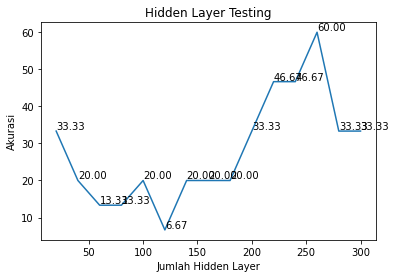

In [69]:
# UJI COBA HIDDEN LAYER

#Inisialisasi Parameter
hl_sizes = 20 #inisialisasi parameter jumlah hidden layer
learning_rate = 0.1 #inisialisasi nilai learning rate
iteration = 200 #inisialisasi parameter iteration

hidden_layer_test_result = list() #membuat list yang akan menampung nilai hasil perulangan fungsi
test1 = 0 #parameter kontrol perulangan
#memulai perulangan test
while test1 < 15:
    hidden_layer_test = testing(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration) #menjalankan fungsi backpropagation
    hidden_layer_test_result.append(hidden_layer_test) #menambah hasil fungsi kedalam list hidden_layer_test_result
    hl_sizes = hl_sizes + 20 #parameter kontrol perulangan
    test1 = test1+1 #parameter kontrol perulangan
    
# Visualisasi Hasil
x = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300] #mendefinisikan variabel x untuk visualisasi (horizontal)
y = np.array(hidden_layer_test_result).reshape(test1,) #mendefinisikan variabel y untuk visualisasi (nilai akurasi (vertikal))
plt.plot(x,y) #melakukan fitting plot untuk variabel x dan y
plt.xlabel('Jumlah Hidden Layer') #memberikan teks keterangan pada diagram visual
plt.ylabel('Akurasi') #memberikan teks keterangan pada diagram visual
plt.title('Hidden Layer Testing') #memberikan teks judul pada diagram visual
#memulai loop perulangan
for x, y in zip(x, y) :
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 2), ha = 'left')

## Learning Rate Testing

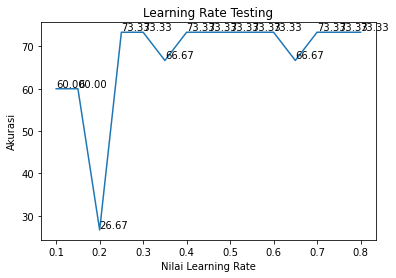

In [70]:
# UJI COBA LEARNING RATE

hl_sizes = 260
learning_rate = 0.1
iteration = 200

learning_rate_test_result = list()
test2 = 0
while test2 < 15:
    learning_rate_test = testing(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration)
    learning_rate_test_result.append(learning_rate_test)
    learning_rate = learning_rate + 0.05
    test2 = test2+1
    
# Visualisasi Hasil
x = [0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
y = np.array(learning_rate_test_result).reshape(test2,)
plt.plot(x,y)
plt.xlabel('Nilai Learning Rate')
plt.ylabel('Akurasi')
plt.title('Learning Rate Testing')
for x, y in zip(x, y) :
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 2), ha = 'left')

## Iteration Testing

c:\Users\Rama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_percept

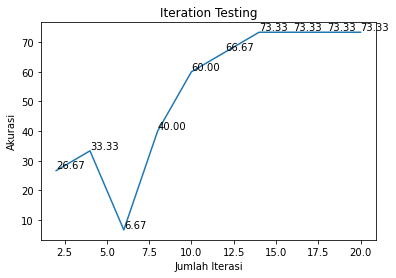

In [71]:
# UJI COBA Iteration

#Inisialisasi Parameter
fitur = tfidf #mendefinisikan feature
target = np.array(df['Label']) #mendefinisikan label atau target

hl_sizes = 260
learning_rate = 0.25
iteration = 2

iteration_test_result = list()
test3 = 0
while test3 < 10:
    iteration_test = testing(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration)
    iteration_test_result.append(iteration_test)
    iteration = iteration + 2
    test3 = test3+1
    
# Visualisasi Hasil
#x = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
x = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
y = np.array(iteration_test_result).reshape(test3,)
plt.plot(x,y)
plt.xlabel('Jumlah Iterasi')
plt.ylabel('Akurasi')
plt.title('Iteration Testing')
for x, y in zip(x, y) :
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 2), ha = 'left')

## HASIL AKHIR

In [72]:
#inisialisasi
fitur = tfidf #mendefinisikan feature
target = np.array(df['Label']) #mendefinisikan label atau target

hl_sizes = 260
learning_rate = 0.25
iteration = 14

#Menjalankan Fungsi Test Akhir
test_akhir = backpropagation(x_train, x_test, y_train, y_test, hl_sizes, learning_rate, iteration)

print('accuration')
print(test_akhir[0],'%')
print('=============')
print('precision')
print(test_akhir[1],'%')
print('=============')
print('recall')
print(test_akhir[2],'%')
print('=============')
print('F1 Score')
print(test_akhir[3],'%')

accuration
73.33333333333333 %
precision
100.0 %
recall
73.33333333333333 %
F1 Score
84.6153846153846 %
